# DAC_AD9726_Gaussian-results.ipynb
### 21/11/2019
### L. Ravera @IRAP
### This Notebook plots Energy resolution measurements of DAC AD9726 as Gaussians 
### (from their mean and rms values).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Definition of colors
c=['maroon', 'r', 'orange', 'darkorchid', 'g', 'steelblue', 'b', 'mediumpurple', 'turquoise', 'gray', 'dark']

In [2]:
cession_20191119_172040={\
         'Values': [0.846, 0.834, 0.877, 0.847, 0.815, 0.857, 0.867, 0.843, 0.822, 0.848],
         'Name': 'BIAS-04 & FEEDBACK-05 - Soudés'}
cession_20191119_161531={\
         'Values': [0.707, 0.695, 0.715, 0.687, 0.701, 0.714, 0.678, 0.683, 0.692, 0.684],
         'Name': 'BIAS-06 & FEEDBACK-07 - Soudés'}
cession_20191119_150725={\
         'Values': [0.687, 0.707, 0.735, 0.691, 0.693, 0.679, 0.683, 0.698, 0.696, 0.700],
         'Name': 'BIAS-00 & FEEDBACK-01 - Soudés'}
cession_20191120_152138={\
         'Values': [0.753, 0.704, 0.721, 0.720, 0.749, 0.782, 0.756, 0.729, 0.751, 0.746],
         'Name': 'BIAS-10 & FEEDBACK-11 - Support'}
cession_20191120_121833={\
         'Values': [0.735, 0.711, 0.714, 0.692, 0.688, 0.687, 0.697, 0.693, 0.696, 0.710],
         'Name': 'BIAS-08 & FEEDBACK-09 - Support'}
cession_20191119_135347={\
         'Values': [0.772, 0.777, 0.776, 0.790, 0.759, 0.776, 0.777, 0.775, 0.745, 0.765],
         'Name': 'BIAS-02 & FEEDBACK-03 - Support'}
cession_20191119_115237={\
         'Values': [0.768, 0.770, 0.766, 0.762, 0.783, 0.766, 0.777, 0.810, 0.806, 0.736],
         'Name': 'BIAS-02 & FEEDBACK-03 - Support'}

List_campaigns_support=[cession_20191120_152138, cession_20191120_121833, cession_20191119_135347, \
                cession_20191119_115237]
List_campaigns_solder=[cession_20191119_172040, cession_20191119_161531, cession_20191119_150725]
List_campaigns=[cession_20191119_172040, cession_20191119_161531, cession_20191119_150725, \
                cession_20191120_152138, cession_20191120_121833, cession_20191119_135347, \
                cession_20191119_115237]


In [3]:
def gauss_func(mean, rms):
    npts=200
    x=(np.arange(npts)-npts/2)*rms*8/npts+mean
    y=np.exp(-(x-mean)**2/(2*rms**2))
    return(x,y)

In [4]:
def plot_gaussians(list_dict):
    fig=plt.figure(1,(12,10))
    ax=fig.add_subplot(1,1,1)
    i_color=0
    for campaign in list_dict:
        values=np.array(campaign['Values'])
        x,y=gauss_func(values.mean(), values.std())
        print('-----')
        print(' Mean {0:5.3f}'.format(values.mean()))
        print(' Std  {0:5.3f}'.format(values.std()))
        ax.plot(x,y,linewidth=2,label=campaign['Name'], color=c[i_color])
        ax.plot([values.mean(),values.mean()],[0,1],':',color=c[i_color])
        i_color+=1
    spec=np.sqrt(0.5**2+0.5**2+0.2**2)
    ax.plot([spec, spec],[0,2],'--r',linewidth=3,label='Req=0.735eV')
    ax.set_title('Summary of results')
    ax.set_xlabel('Energy resolution (eV)')
    ax.set_ylabel('Occurences (normalised)')
    ax.legend(loc="upper left", prop=dict(size=10))
    ax.set_xlim([0.6, 0.95])
    ax.set_ylim([0, 1.35])
    for item in ([ax.title]):
        item.set_weight('bold')
        item.set_fontsize(16)
    for item in ([ax.xaxis.label, ax.yaxis.label]):
        item.set_fontsize(14)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)
        

-----
 Mean 0.846
 Std  0.018
-----
 Mean 0.696
 Std  0.013
-----
 Mean 0.697
 Std  0.015


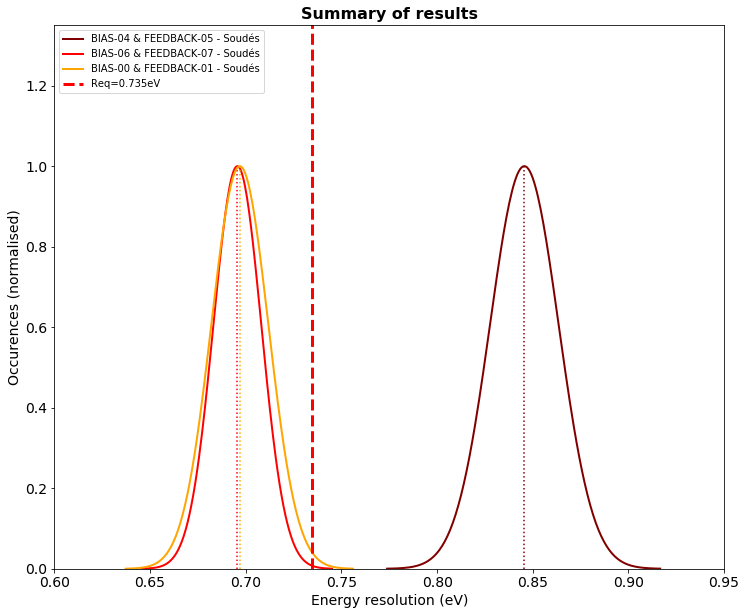

In [5]:
#plot_gaussians(List_campaigns_support)

plot_gaussians(List_campaigns_solder)

#plot_gaussians(List_campaigns)